In [1]:
import numpy as np
import matplotlib.pyplot as plt

from environments.pricing_env import PricingEnvironment
from learners.greedy import Greedy
from learners.ucb import UCB

from data_generators.basic_generator import BasicDataGenerator
%matplotlib inline 

In [2]:
data_gen = BasicDataGenerator(filename='src/basic002.json')
prices = data_gen.get_prices()
bids = data_gen.get_bids()
margins = data_gen.get_margins()
conv_rates = data_gen.get_conversion_rates(mode='aggregate')
n_clicks = data_gen.get_daily_clicks(mode='aggregate')
costs_per_click = data_gen.get_costs_per_click(mode='aggregate')
aggr_tau = data_gen.get_future_purchases(mode='aggregate')

print(15*'-','DATA', '-'*15)
print(f'{prices=}')
print(f'{bids=}')
print(f'{margins=}')
print(f'{conv_rates=}')
print(f'{costs_per_click=}')
print(f'{n_clicks=}')
print(f'{aggr_tau=}')

sel_bid = 3
print(f'\nSelected bid: {bids[sel_bid]}({sel_bid})')
print(f'Fixed CPC: {costs_per_click[sel_bid]}')
print(f'Fixed num_clicks: {n_clicks[sel_bid]} -> {np.rint(n_clicks[sel_bid]).astype(int)}')

print('\n',15*'-','SIMULATION PARAMS', '-'*15)
T = 365
n_experiments = 10
print(f'Time horizon: {T} days')
print(f'Num. experiments: {n_experiments}')

--------------- DATA ---------------
prices=[15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
bids=[0.03, 0.04, 0.07, 0.1, 0.2, 0.5, 0.75, 1.0, 1.5, 2.0]
margins=[15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
conv_rates=array([0.204, 0.211, 0.205, 0.189, 0.176, 0.152, 0.128, 0.113, 0.097,
       0.09 ])
costs_per_click=array([0.03 , 0.04 , 0.069, 0.097, 0.189, 0.44 , 0.626, 0.796, 1.1  ,
       1.367])
n_clicks=array([ 20.018,  26.03 ,  42.358,  56.468,  91.773, 143.8  , 163.133,
       174.226, 185.61 , 190.621])
aggr_tau=array([2.85 , 2.485, 2.12 , 1.755, 1.39 , 1.025, 0.84 , 0.69 , 0.65 ,
       0.65 ])

Selected bid: 0.1(3)
Fixed CPC: 0.097
Fixed num_clicks: 56.468 -> 56

 --------------- SIMULATION PARAMS ---------------
Time horizon: 365 days
Num. experiments: 10


In [3]:
rewards_per_experiment = {}
rewards_per_experiment['Greedy'] = []
rewards_per_experiment['UCB'] = []
daily_rewards_per_experiment = {}
daily_rewards_per_experiment['Greedy'] = []
daily_rewards_per_experiment['UCB'] = []

In [7]:
n_arms = len(prices) 
env_params = {
        'n_arms': n_arms,
        'conversion_rates': conv_rates,
        'cost_per_click': costs_per_click[sel_bid],
        'n_clicks': np.rint(n_clicks[sel_bid]).astype(int),
        'margins': margins, 
        'tau': aggr_tau
    }
for e in range(n_experiments):
    # Initialization of the learners to test and their related environment:
    # the list is composed of tuples (Learner, Environment)
    test_instances = [
        ("Greedy", Greedy(n_arms), PricingEnvironment(**env_params)),
        ("UCB", UCB(n_arms), PricingEnvironment(**env_params))
    ]
    
    for t in range(T):
        for name, learner, env in test_instances:
            pulled_arm = learner.pull_arm()
            daily_rewards = env.round(pulled_arm)
            for rew in daily_rewards:
                learner.update(pulled_arm, rew)
            learner.update_daily_rewards(np.sum(daily_rewards))
            if t % 25 == 0:
                print(f't: {t}\n{name}\n{pulled_arm=}\n{daily_rewards=}')
                print(30*'-')

    for learner_name, learner, _ in test_instances:
        rewards_per_experiment[learner_name].append(learner.collected_rewards)
        daily_rewards_per_experiment[learner_name].append(learner.daily_collected_rewards)

t: 0
Greedy
pulled_arm=0
daily_rewards=array([-0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , 48.72276632, -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       47.44405134, -0.097     , -0.097     , -0.097     , -0.097     ,
       55.39467476, -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , 30.02221989,
       49.64079511, 55.94684844, -0.097     , 30.17760214, -0.097     ,
       -0.097     , 27.07901875, -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , 35.29889992, -0.097     , -0.097     , -0.097     ,
       -0.097     ])
------------------------------
t: 0
UCB
pulled_arm=9
daily_rewards=array([-0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0

t: 150
Greedy
pulled_arm=0
daily_rewards=array([-0.097     , 29.35601931, 71.2864055 , -0.097     , -0.097     ,
       -0.097     , -0.097     , 70.58942449, -0.097     , -0.097     ,
       -0.097     , -0.097     , 56.31700525, -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , 66.05518466, 51.46180778,
       -0.097     , 68.69686834, -0.097     , -0.097     , 47.00238283,
       -0.097     , -0.097     , -0.097     , 49.35967409, -0.097     ,
       -0.097     , -0.097     , -0.097     , 57.9958566 , 64.59194577,
       41.89401767, -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , 76.4834811 , 51.00832203, -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     ])
------------------------------
t: 150
UCB
pulled_arm=5
daily_rewards=array([29.72113104, -0.097     , 60.18509811, -0.097     , -0.097     ,
     

t: 300
Greedy
pulled_arm=0
daily_rewards=array([-0.097     , -0.097     , -0.097     , 54.98120573, -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , 71.21266854, -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , 73.67821089, -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , 47.26633581, -0.097     , -0.097     ,
       45.97646611, 56.30047646, 53.9369798 , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , 56.51254397, -0.097     , -0.097     , 50.82397773,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     ])
------------------------------
t: 300
UCB
pulled_arm=5
daily_rewards=array([-0.097     , -0.097     , 53.34189219, -0.097     , -0.097     ,
     

t: 50
Greedy
pulled_arm=0
daily_rewards=array([-0.097     , 47.56357017, -0.097     , 65.98432479, -0.097     ,
       55.26360776, -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       68.58616779, -0.097     , -0.097     , 75.03360651, -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , 39.58216197, -0.097     ,
       -0.097     , 69.76878183, -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     ])
------------------------------
t: 50
UCB
pulled_arm=4
daily_rewards=array([-0.097     , -0.097     , 34.23387401, -0.097     , -0.097     ,
       

t: 200
Greedy
pulled_arm=0
daily_rewards=array([36.33835619, -0.097     , -0.097     , -0.097     , 40.86927334,
       69.36613559, -0.097     , -0.097     , 60.55604192, -0.097     ,
       -0.097     , -0.097     , -0.097     , 83.14679598, -0.097     ,
       56.21220176, -0.097     , 65.43386198, -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       59.26884606, -0.097     , 54.3575561 , -0.097     , -0.097     ,
       -0.097     , -0.097     , 79.18252948, -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     ])
------------------------------
t: 200
UCB
pulled_arm=4
daily_rewards=array([69.55940808, -0.097     , -0.097     , 52.26158571, -0.097     ,
     

t: 350
Greedy
pulled_arm=0
daily_rewards=array([55.80669682, -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , 82.38513365, -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , 60.72064601, -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       79.19888736, -0.097     , -0.097     , -0.097     , 60.43568614,
       -0.097     , -0.097     , -0.097     , -0.097     , 62.13262077,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , 59.16626816, -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     ])
------------------------------
t: 350
UCB
pulled_arm=4
daily_rewards=array([-0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
     

t: 125
Greedy
pulled_arm=0
daily_rewards=array([-0.097     , 64.78631458, -0.097     , 46.35015062, -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , 65.99035006, -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , 69.47463155, 41.14720342,
       -0.097     , 68.5595172 , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , 46.22544853, -0.097     , -0.097     ,
       -0.097     , 44.83116634, 69.00528315, 61.43268868, 84.25126803,
       -0.097     , -0.097     , 39.24149444, 58.77036423, -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , 58.16106167, -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     ])
------------------------------
t: 125
UCB
pulled_arm=4
daily_rewards=array([-0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
     

t: 275
Greedy
pulled_arm=0
daily_rewards=array([66.94758008, -0.097     , 77.90593253, -0.097     , -0.097     ,
       -0.097     , 52.08775237, -0.097     , 54.24205034, -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , 59.29027594, -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , 50.70846623, 51.86254505,
       -0.097     , 64.38855067, -0.097     , 59.55060156, 72.69134457,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , 60.42582431, 61.13566012, 38.3390664 , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , 44.35991433,
       57.0570972 , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , 52.2616781 , -0.097     , -0.097     ,
       -0.097     ])
------------------------------
t: 275
UCB
pulled_arm=4
daily_rewards=array([-0.097     , -0.097     , -0.097     , 45.17167317, -0.097     ,
     

t: 50
Greedy
pulled_arm=0
daily_rewards=array([-0.097     , 53.1193933 , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       57.65142446, -0.097     , -0.097     , -0.097     , -0.097     ,
       49.89971087, 52.6891253 , -0.097     , -0.097     , 82.23962006,
       -0.097     , -0.097     , 41.27448846, -0.097     , -0.097     ,
       40.81307006, -0.097     , 43.76224369, -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , 59.28938932, -0.097     , -0.097     , -0.097     ,
       -0.097     ])
------------------------------
t: 50
UCB
pulled_arm=7
daily_rewards=array([-0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       

t: 200
Greedy
pulled_arm=0
daily_rewards=array([-0.097     , -0.097     , 51.65378114, -0.097     , 75.4843575 ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , 52.37222439, -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       54.14678247, -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , 71.09366781, -0.097     ,
       -0.097     , 38.93110021, 44.45272953, -0.097     , -0.097     ,
       -0.097     , -0.097     , 62.38220607, -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , 70.09501729, -0.097     ,
       -0.097     ])
------------------------------
t: 200
UCB
pulled_arm=3
daily_rewards=array([-0.097     , 81.57852891, -0.097     , -0.097     , -0.097     ,
     

t: 325
Greedy
pulled_arm=0
daily_rewards=array([60.62920278, 46.26940747, -0.097     , -0.097     , 24.38658765,
       -0.097     , -0.097     , -0.097     , 51.31394419, -0.097     ,
       -0.097     , -0.097     , 65.40464838, -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , 20.40908894,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       37.8755359 , -0.097     , -0.097     , 50.82017491, -0.097     ,
       -0.097     , -0.097     , 59.43215825, 55.70155596, 74.16103296,
       -0.097     , 43.74238024, 65.67550609, -0.097     , -0.097     ,
       63.88236381, -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , 94.86310388, -0.097     , 76.24366111, 54.32694821,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     ])
------------------------------
t: 325
UCB
pulled_arm=3
daily_rewards=array([-0.097     , 58.14433403, -0.097     , -0.097     , 40.51791823,
     

t: 100
Greedy
pulled_arm=0
daily_rewards=array([-0.097     , -0.097     , 63.99098565, -0.097     , -0.097     ,
       -0.097     , -0.097     , 47.05934114, -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , 36.9292938 , -0.097     ,
       46.36785964, 61.83992655, -0.097     , 45.92836861, -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , 62.84791193,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       71.27117468, -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , 59.89863016, -0.097     , -0.097     ,
       -0.097     ])
------------------------------
t: 100
UCB
pulled_arm=3
daily_rewards=array([-0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
     

t: 250
Greedy
pulled_arm=0
daily_rewards=array([66.34886169, -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , 60.32207361, 38.53269713, -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       63.5894404 , -0.097     , 66.31796658, -0.097     , -0.097     ,
       -0.097     , -0.097     , 43.64689117, -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       54.54531128, 48.07981507, -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , 67.13396001,
       -0.097     , -0.097     , 76.30086639, 53.65436054, -0.097     ,
       37.16353695, 36.18488119, -0.097     , -0.097     , -0.097     ,
       30.90714274, -0.097     , -0.097     , -0.097     , 51.98424723,
       33.66236795])
------------------------------
t: 250
UCB
pulled_arm=3
daily_rewards=array([-0.097     , -0.097     , 50.29693888, -0.097     , -0.097     ,
     

t: 50
Greedy
pulled_arm=0
daily_rewards=array([-0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       91.00827304, -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , 60.40636484, -0.097     ,
       -0.097     , -0.097     , 71.71501396, -0.097     , 35.53140671,
       -0.097     , -0.097     , 36.24513967, 63.76148197, -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , 76.95101935,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , 55.00778002, -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , 33.20901877, -0.097     ,
       -0.097     , -0.097     , -0.097     , 58.62395023, 35.80456955,
       -0.097     ])
------------------------------
t: 50
UCB
pulled_arm=0
daily_rewards=array([-0.097     , 58.42226947, -0.097     , 73.02007982, -0.097     ,
       

t: 200
Greedy
pulled_arm=0
daily_rewards=array([-0.097     , 69.49593771, -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , 80.80553565,
       -0.097     , -0.097     , 68.03851772, -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       68.87170192, -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , 67.16676888, -0.097     ,
       -0.097     , 47.53433697, 23.61707895, -0.097     , -0.097     ,
       36.96872382, -0.097     , -0.097     , 42.82909331, -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       47.82401027, -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , 44.17760335, -0.097     , -0.097     , -0.097     ,
       -0.097     ])
------------------------------
t: 200
UCB
pulled_arm=0
daily_rewards=array([-0.097     , -0.097     , -0.097     , 33.73174771, -0.097     ,
     

t: 350
Greedy
pulled_arm=0
daily_rewards=array([-0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , 66.48336691, -0.097     ,
       -0.097     , 58.91994543, -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , 51.75790877, -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       52.30737762, -0.097     , -0.097     , -0.097     , 43.37935701,
       -0.097     , 54.57251888, -0.097     , -0.097     , -0.097     ,
       53.64648539, -0.097     , -0.097     , -0.097     , -0.097     ,
       63.91669129, -0.097     , 56.33114868, 39.61957904, -0.097     ,
       -0.097     ])
------------------------------
t: 350
UCB
pulled_arm=0
daily_rewards=array([-0.097     , -0.097     , -0.097     , 60.16665667, -0.097     ,
     

t: 125
Greedy
pulled_arm=0
daily_rewards=array([-0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , 76.21822765,
       65.99803991, -0.097     , 66.87182726, -0.097     , -0.097     ,
       47.57267282, -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , 59.63234262, -0.097     , 75.84317515,
       -0.097     , -0.097     , 75.82833064, 66.80107156, -0.097     ,
       74.19434006, -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , 63.87534773, -0.097     , -0.097     ,
       -0.097     , -0.097     , 77.54847512, -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     ])
------------------------------
t: 125
UCB
pulled_arm=2
daily_rewards=array([-0.097     , 44.2926997 , 56.6304084 , -0.097     , -0.097     ,
     

t: 275
Greedy
pulled_arm=0
daily_rewards=array([-0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , 75.3959019 ,
       -0.097     , -0.097     , 54.67757092, -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , 75.83703925,
       -0.097     , 55.63691015, -0.097     , -0.097     , -0.097     ,
       79.25778234, -0.097     , -0.097     , -0.097     , 40.18025702,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       46.45629208, -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , 65.2415943 ,
       79.33119699])
------------------------------
t: 275
UCB
pulled_arm=2
daily_rewards=array([-0.097     , 29.58830652, -0.097     , -0.097     , -0.097     ,
     

t: 50
Greedy
pulled_arm=0
daily_rewards=array([-0.097     , -0.097     , 52.54565212, -0.097     , 51.16208735,
       -0.097     , 53.88595797, 45.91902483, -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       49.8504576 , -0.097     , -0.097     , -0.097     , -0.097     ,
       64.63263459, -0.097     , -0.097     , -0.097     , -0.097     ,
       70.28459096, -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , 81.11976832, -0.097     ,
       -0.097     , 78.62291954, -0.097     , 24.43629874, 53.54046167,
       -0.097     , -0.097     , -0.097     , -0.097     , 31.75768034,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , 56.31102205, -0.097     , -0.097     ,
       49.20460575])
------------------------------
t: 50
UCB
pulled_arm=0
daily_rewards=array([-0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       

t: 175
Greedy
pulled_arm=0
daily_rewards=array([-0.097     , -0.097     , -0.097     , 39.03469108, -0.097     ,
       -0.097     , 60.66073606, -0.097     , -0.097     , 57.05103243,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       50.08469678, 75.98987671, -0.097     , 57.56064682, 71.25657346,
       -0.097     , 75.24728903, -0.097     , -0.097     , 52.6727765 ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , 30.84266389,
       -0.097     , -0.097     , 65.76785446, -0.097     , -0.097     ,
       95.71958509, -0.097     , -0.097     , -0.097     , -0.097     ,
       42.13831566, -0.097     , -0.097     , -0.097     , -0.097     ,
       53.77066197])
------------------------------
t: 175
UCB
pulled_arm=0
daily_rewards=array([-0.097     , -0.097     , -0.097     , 57.77493692, -0.097     ,
     

t: 300
Greedy
pulled_arm=0
daily_rewards=array([-0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       56.32065879, 66.55999634, 69.76002572, 57.4552285 , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       81.68568836, 50.83853495, -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , 36.95996642, -0.097     , 79.08319842, 66.68362811,
       -0.097     , -0.097     , 73.17252765, 62.90561356, -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , 62.55016649,
       -0.097     ])
------------------------------
t: 300
UCB
pulled_arm=0
daily_rewards=array([-0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
     

t: 75
Greedy
pulled_arm=0
daily_rewards=array([-0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , 48.4076686 ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       27.66624401, -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , 48.15179712, -0.097     , 87.90366323, -0.097     ,
       -0.097     , 64.09606462, 69.48430377, -0.097     , -0.097     ,
       73.87757846, -0.097     , 53.84023718, -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , 52.32750984, -0.097     , 74.73642261, -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , 63.21527072, -0.097     , -0.097     , 89.29832278,
       -0.097     ])
------------------------------
t: 75
UCB
pulled_arm=4
daily_rewards=array([-0.097     , 51.66376946, -0.097     , -0.097     , -0.097     ,
       

t: 200
Greedy
pulled_arm=0
daily_rewards=array([-0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , 52.67677182, 44.36849027, 46.3037729 , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , 40.77545009,
       -0.097     , -0.097     , 47.61273589, -0.097     , -0.097     ,
       50.96547256, -0.097     , 54.09895534, -0.097     , -0.097     ,
       62.1140923 , -0.097     , -0.097     , -0.097     , 48.38835266,
       71.52982725, -0.097     , -0.097     , 61.13926206, -0.097     ,
       -0.097     , -0.097     , 56.98367417, -0.097     , -0.097     ,
       79.87691397, -0.097     , 36.96101116, -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , 63.43754949, 66.30359315, -0.097     ,
       -0.097     ])
------------------------------
t: 200
UCB
pulled_arm=4
daily_rewards=array([54.37018285, -0.097     , -0.097     , -0.097     , 54.29854124,
     

t: 350
Greedy
pulled_arm=0
daily_rewards=array([-0.097     , -0.097     , 65.7392472 , 53.27069602, -0.097     ,
       -0.097     , 72.56650813, 64.9834097 , -0.097     , 61.38044357,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , 41.69989017, -0.097     ,
       -0.097     , -0.097     , 68.75280581, -0.097     , -0.097     ,
       -0.097     , 59.74229253, -0.097     , -0.097     , -0.097     ,
       34.11692345, -0.097     , -0.097     , -0.097     , 50.73591114,
       -0.097     , -0.097     , 53.79299633, -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , 54.28319819, -0.097     , 67.47384737, -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , 60.93676978,
       42.24778281])
------------------------------
t: 350
UCB
pulled_arm=4
daily_rewards=array([-9.70000000e-02, -9.70000000e-02, -9.70000000e-02, -9.70000000e-02,
  

t: 100
Greedy
pulled_arm=0
daily_rewards=array([-9.70000000e-02, -9.70000000e-02, -9.70000000e-02,  5.35775820e+01,
       -9.70000000e-02, -9.70000000e-02, -9.70000000e-02, -9.70000000e-02,
        1.00163141e+02, -9.70000000e-02, -9.70000000e-02, -9.70000000e-02,
       -9.70000000e-02, -9.70000000e-02, -9.70000000e-02,  7.01754558e+01,
       -9.70000000e-02, -9.70000000e-02,  5.38977559e+01, -9.70000000e-02,
       -9.70000000e-02, -9.70000000e-02,  6.06586312e+01,  3.77685819e+01,
       -9.70000000e-02, -9.70000000e-02, -9.70000000e-02, -9.70000000e-02,
        7.66432146e+01, -9.70000000e-02,  1.36587912e+01, -9.70000000e-02,
       -9.70000000e-02,  3.64458769e+01,  7.33279637e+01, -9.70000000e-02,
        8.48704710e+01, -9.70000000e-02, -9.70000000e-02,  5.40011222e+01,
       -9.70000000e-02, -9.70000000e-02, -9.70000000e-02, -9.70000000e-02,
       -9.70000000e-02, -9.70000000e-02,  6.49316042e+01,  5.23402267e+01,
       -9.70000000e-02,  3.73720227e+01, -9.70000000e-02, -

t: 250
Greedy
pulled_arm=0
daily_rewards=array([-0.097     , 50.41950063, -0.097     , -0.097     , 77.66928755,
       51.77839603, -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , 63.66317753, 51.27078558, 84.15008596, 51.29505026,
       -0.097     , -0.097     , 76.99994499, -0.097     , 64.5752909 ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , -0.097     , 55.29674649, -0.097     ,
       -0.097     , -0.097     , -0.097     , -0.097     , -0.097     ,
       -0.097     , -0.097     , 47.14815341, -0.097     , -0.097     ,
       -0.097     , 38.34110895, -0.097     , -0.097     , 25.46843654,
       -0.097     , -0.097     , -0.097     , -0.097     , 46.84100833,
       -0.097     ])
------------------------------
t: 250
UCB
pulled_arm=7
daily_rewards=array([-0.097     , 46.44266767, -0.097     , -0.097     , -0.097     ,
     

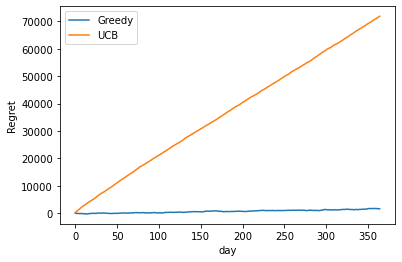

In [8]:
opt_per_round = test_instances[0][2].get_opt()
opt_per_day = opt_per_round * env_params['n_clicks']

#opt = [opt_per_day]*T

# Plotting the results
plt.figure()
plt.ylabel("Regret")
plt.xlabel("day")
plt.plot(np.cumsum(np.mean(opt_per_day - daily_rewards_per_experiment['Greedy'], axis=0)))
plt.plot(np.cumsum(np.mean(opt_per_day - daily_rewards_per_experiment['UCB'], axis=0)))
plt.legend(["Greedy", "UCB"])

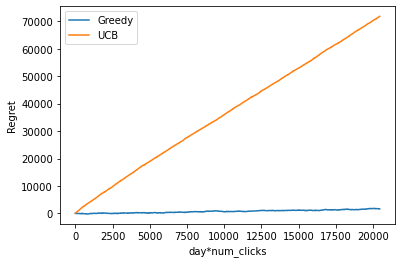

In [9]:
opt_per_round = test_instances[0][2].get_opt()
opt_per_day = opt_per_round * env_params['n_clicks']

# Plotting the results
plt.figure()
plt.ylabel("Regret")
plt.xlabel("day*num_clicks")
plt.plot(np.cumsum(np.mean(opt_per_round - rewards_per_experiment['Greedy'], axis=0)))
plt.plot(np.cumsum(np.mean(opt_per_round - rewards_per_experiment['UCB'], axis=0)))
plt.legend(["Greedy", "UCB"])